In [366]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import scipy.stats
from scipy.signal import savgol_filter

In [333]:
#Func to convert index n to l,m
def ntolm(n):
    lt = (np.sqrt(8.0*n+1)-1.0)/2.0
    l = int(lt)
    m = int(n-l*(l+1)/2)
    return l,m

In [334]:
weights = np.loadtxt("/home/vaishali/Desktop/weights_EB_smica_R3.00.txt")
e_weights = np.ndarray(shape=(7,4001))
e_weights = weights[:7,:]


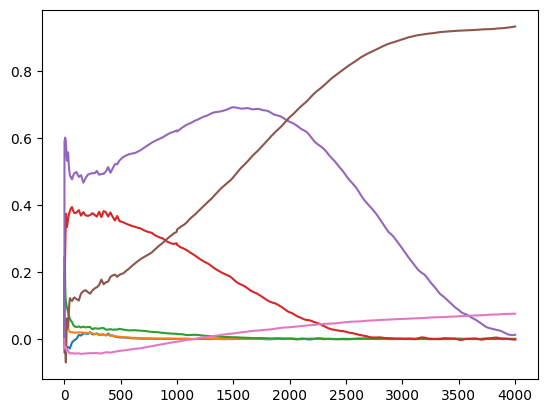

In [335]:
el = np.ndarray(shape=(4001))
for i in range(4001):
    el[i] = i
for i in range(7):    
    plt.plot(el,e_weights[i,:])


Getting the elm_nu for the seven frequency channels

In [336]:
npix = 12*1024*1024
mapt=np.ndarray(shape=(7,npix))
mapq=np.ndarray(shape=(7,npix))
mapu=np.ndarray(shape=(7,npix))

In [338]:
mapq[0] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=1)
mapq[1] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=1)
mapq[2] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=1)
mapq[3] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=1),nside_out=1024)
mapq[4] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=1),nside_out=1024)
mapq[5] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=1),nside_out=1024)
mapq[6] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=1),nside_out=1024)

In [339]:
mapu[0] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=2)
mapu[1] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=2)
mapu[2] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=2)
mapu[3] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=2),nside_out=1024)
mapu[4] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=2),nside_out=1024)
mapu[5] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=2),nside_out=1024)
mapu[6] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=2),nside_out=1024)


In [340]:
mapt[0] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=0)
mapt[1] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=0)
mapt[2] = hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=0)
mapt[3] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=0),nside_out=1024)
mapt[4] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=0),nside_out=1024)
mapt[5] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=0),nside_out=1024)
mapt[6] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=0),nside_out=1024)

In [341]:
mask = hp.ud_grade(hp.read_map("/home/vaishali/Desktop/transition_mask.fits.gz"),nside_out=1024)
print(mask.shape)
npix = mask.shape[0]
nside = hp.npix2nside(npix)
print(nside)

(12582912,)
1024


In [342]:
fsky = np.count_nonzero(mask == 1)/(len(mask))
print(fsky)

0.5954338709513346


Using fsky = 59%

In [343]:
lmax=1300
n_alms=int(0.5*(lmax+1)*(lmax+2))
maps = np.ndarray(shape=(3,npix))
elms = np.ndarray(shape=(7,n_alms))
for i in range(7):
    maps[0,:]=mapt[i]
    maps[1,:]=mapq[i]
    maps[2,:]=mapu[i]
    elms[i] = hp.map2alm(maps*mask,pol=True,lmax=1300)[1]
    

/tmp/ipykernel_191572/1500298819.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  elms[i] = hp.map2alm(maps*mask,pol=True,lmax=1300)[1]


In [352]:
elm_smica = np.zeros(shape=(n_alms))
for j in range(n_alms):
    l,m = ntolm(j)
    if l>150:
        for k in range(7):
            elm_smica[j] = elm_smica[j] + e_weights[k,l]*elms[k,j]

In [360]:
nu0=57
bnupol = np.ndarray(shape=(7))
nu = np.array([30,44,70,100,143,217,353])
bnupol = (nu/(nu0*np.tanh(nu/(2*nu0)))) - 1

In [361]:
blm_pol = np.zeros(shape=(n_alms))
for i in range(n_alms):
    l,m = ntolm(i)
    if l>150:
        for v in range(6):
            blm_pol[i] = blm_pol[i] + (bnupol[v]*e_weights[v,l]*elms[v,i]/elm_smica[i])
            

Smoothening histogram using savtzky-Golay filter and getting the value of the mode (This is for fsky = 59%)

In [368]:
temp = np.zeros(shape=(lmax+1))
bins = [[] for _ in range(lmax+1)]
for j in range(n_alms):
    l,m = ntolm(j)
    if l>150: 
         bins[l].append(blm_pol[j])
         if m!=0:
             bins[l].append(blm_pol[j]) 

for l in range(lmax+1):
    if l>150:    
        hist, bin_edges = np.histogram(bins[l], bins='auto', density=True)
# Smooth the histogram using Savitzky-Golay filter
        smooth_hist = savgol_filter(hist, window_length=5, polyorder=4)
# Find the mode
        mode_bin = np.argmax(smooth_hist)
        temp[l] = (bin_edges[mode_bin] + bin_edges[mode_bin + 1]) / 2
print(temp[501])    


1.8262756576531949


In [369]:
np.savetxt('b_l_pol',temp)